# Predicting the Future of Airline Passengers

In this assignment, we'll attempt to make a prediction of a timeseries dataset using a linear prediction.

However, this time we'll be using real data. Load the `air_passengers.csv` and take a look at it.

I recommend using `sns.lineplot(data=df, ...)` or `df.plot(kind="line", ...)` to inspect it.

To simplify working with this data, I've added a special column, `df['Month Count']` which is the number of months since the first month in the dataset. This way you can have a simple numeric x-axis instead of a datetime.

## Assignment

**Part 1**
In this assigment, you're going to try and predict the future ridership. First, reproduce the steps from the last exercise to predict the future ridership using sklearn.

**Part 2**
Once you have a working prediction, we should try redoing the prediction after removing noise from the data. Here's an eample of doing trend decomposition assuming a 12-year period.

```python
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)
df["Trend"] = pd.Series(decomposition.trend)
df["Seasonal"] = pd.Series(decomposition.seasonal)
df["Residual"] = pd.Series(decomposition.resid)
```

Attempt to do a prediction using the Trend.

**Extra**
Ask yourself if there's a way you can if there's a way you can incorporate the Seasonal component into your prediction.

In [ ]:
from google.colab import drive
import pandas as pd

# Mount gdrive
drive.mount('/content/gdrive')

# Loading the dataset and cleaning it up
df = pd.read_csv('/content/gdrive/My Drive/datasets/air_passengers.csv')
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
df['Month Count'] = (df['Month'].dt.year - 1949) * 12 + df['Month'].dt.month - 1

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


NameError: name 'df' is not defined

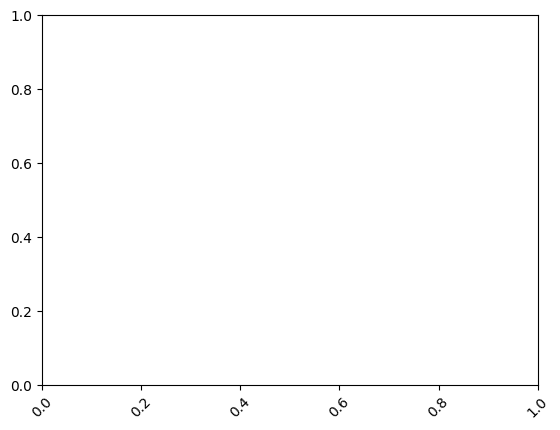

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=45)

sns.lineplot(df, x="Month Count", y="Passengers", color="blue")

decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)
df["Trend"] = pd.Series(decomposition.trend)
df["Seasonal"] = pd.Series(decomposition.seasonal)
df["Residual"] = pd.Series(decomposition.resid)

sns.lineplot(df, x="Month Count", y="Trend", color="red")
sns.lineplot(df, x="Month Count", y="Seasonal", color="green")
sns.lineplot(df, x="Month Count", y="Residual", color="lightgreen")

X = df.dropna(how="any")[["Month Count"]]
y = df.dropna(how="any")["Trend"]

model = LinearRegression()
model.fit(X, y)

pred_months_start = df["Month Count"].max()
pred_months_end = pred_months_start + 24

pred_X = pd.DataFrame({"Month Count": range(pred_months_start, pred_months_end)})
pred_y = model.predict(pred_X)

pred_df = pred_X
pred_df["Trend"] = pred_y
pred_df["Seasonal"] = df.dropna(how="any")["Seasonal"][:24]
pred_df["Pred"] = pred_df["Trend"] + pred_df["Seasonal"]

sns.lineplot(pred_df, x="Month Count", y="Pred", color="gold", label="Prediction")



In [ ]:

# y = df.dropna(how="any")["Trend"]
# X = df.dropna(how="any")[['Month Count']]

# # Fit the linear regression model
# model = LinearRegression()
# model.fit(X, y)

# # Generate future values
# from_month_count = X["Month Count"].max()
# to_month_count = from_month_count + 24
# future_X = pd.DataFrame({'Month Count': range(from_month_count, to_month_count)})

# # Predict future values
# future_y = model.predict(future_X)

# # Create a DataFrame for the forecast
# forecast_df = future_X
# forecast_df['Trend'] = future_y

# # Pull out the seasonal from the last 24 months
# #forecast_df['Seasonal'] = df["Seasonal"][:24]
# forecast_df["Prediction"] = forecast_df["Trend"] + df["Seasonal"][:24]
# forecast_df["Month Count"] += (df["Month Count"].max() - forecast_df["Month Count"].min())
# sns.lineplot(forecast_df, x="Month Count", y="Prediction", color="orange")

